Иногда бывает полезным сравнить друг с другом различные визуальные представления одних и тех же данных. Matplotlib предлагает концепцию _subplots_ (подизображений?): группа небольших осей, которые могут существовать внутри одного изображения. Эти subplots могут быть встроенными, набором изображений или другими, более сложными, разметками. В этом разделе мы рассмотрим четыре подхода к созданию subplots в Matplotlib.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

# `plt.axes`: Subplots созданные вручную

Наиболее базовым методом создания осей является использование функции `plt.axes`. Как мы уже видели ранее, по умолчанию эта функция создает стандартный объект axes, который заполняет всё изображение. `plt.axes` также принимает необязательный аргумент, которые представляет из себя список их четырех чисел внутри системы координат изображения. Эти числа представляют `[left, bottom, width, height]` внутри системы координат изображения, которая начинается от 0 в левом нижнем углу изображения до 1 в правом верхнем углу изображения.

Например, мы можем создать встроенные (inset) оси в правом верхнем углу других, уже существующих, осей, путем установки позиции _x_ и _y_ в 0.65 (т.е. начиная от 65% ширины и 65% высоты текущего изображения) и увеличения _x_ и _y_ до 0.2 (т.е. размер осей 20% от ширины и 20% от высоты изображения):

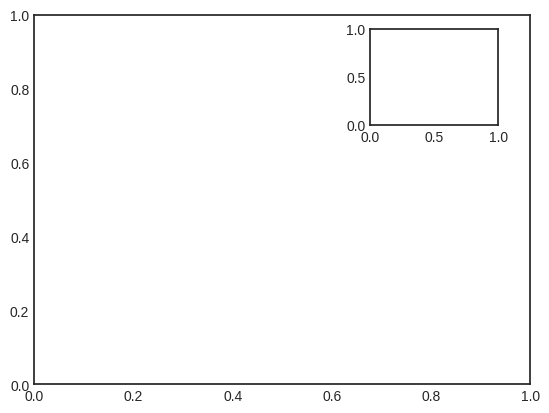

In [3]:
ax1 = plt.axes()  # стандартные оси
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.axes:-Subplots-by-Hand

Остановился на:
The equivalent of this command within the object-oriented interface ...